Fixing the uptake and impact of contaminants on epifauna within the Atlantis model (seagrass, macroalgae, filter feeders, shellfish)

In [6]:
import os
import re
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
from pathlib import Path
import matplotlib.pyplot as plt
import ssam_groups as groups
import ssam_plot as splot

Problem - no contamiannts in epifauna
- No fprints with epifauna observed within Species_Contaminant_Uptake() or Group_Transfer_Contaminant()

Tests with atContaminants.c:
- line 727: removed "&& (FunctGroupArray[sp].habitatCoeffs[habitat] > 0)" from the conditions > resulted in fprints with epifauna included


In [21]:
scenario_root = Path('/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Tests/')
scenario_paths = sorted([p for p in scenario_root.glob('epifauna*/outputSalishSea.nc')])
scenario_datasets = [xr.open_dataset(scen,decode_cf=True) for scen in scenario_paths]
for path in scenario_paths:
    print(path.parent.stem)

epifauna
epifauna_line727
epifauna_sed_test
epifauna_sed_test_20
epifauna_sed_test_20_physics
epifauna_uptake


### Water column contaminants

In [11]:
def water_column_conc(group, plot_name):
    for scenario, path in zip(scenario_datasets, scenario_paths):
        fig, ax = plt.subplots(figsize = (14,3))
        nm = path.parent.stem
        for variable in group:
            contam_tbl = np.ma.filled(scenario.variables[variable], np.nan)
            time = np.ma.filled(scenario.variables['t'], np.nan)
            contam_tb = contam_tbl.sum(axis=2)
            contam_t = contam_tb.sum(axis=1)
            ax.semilogy(time, contam_t) 
        ax.legend(group)
        ax.set_ylabel('Concentration (mg/m$^3$)')
        ax.set_xlabel('Time')
        ax.set_title(plot_name + ' scenario:' + nm)

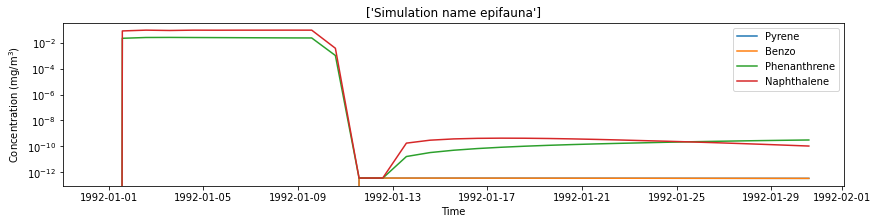

In [28]:
water_column_conc(groups.pahs, 'water column')


### Sediment contaminants

In [14]:
def sediment_conc(group, plot_name):
    for scenario, path in zip(scenario_datasets, scenario_paths):
        fig, ax = plt.subplots(figsize = (14,3))
        nm = path.parent.stem
        for variable in group:
            contam_tb = np.ma.filled(scenario.variables[variable][:,:,6], np.nan)
            time = np.ma.filled(scenario.variables['t'], np.nan)
            contam_t = contam_tb.sum(axis=1)
            ax.semilogy(time, contam_t) 
        ax.legend(group)
        ax.set_ylabel('Concentration (mg/m$^2$)')
        ax.set_xlabel('Time')
        ax.set_title(plot_name + ' scenario:' + nm)

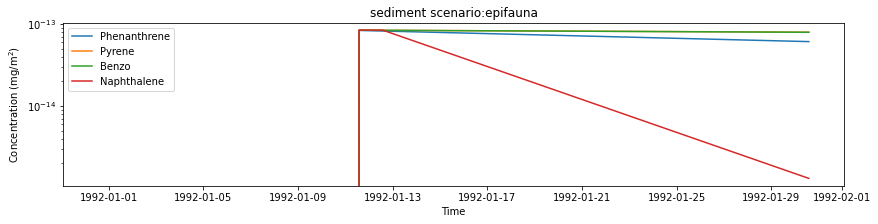

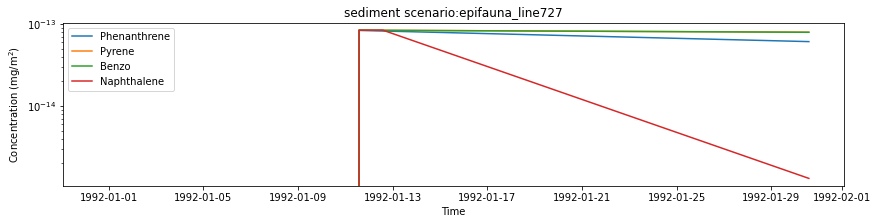

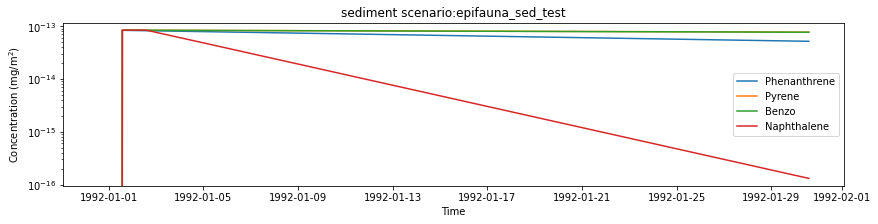

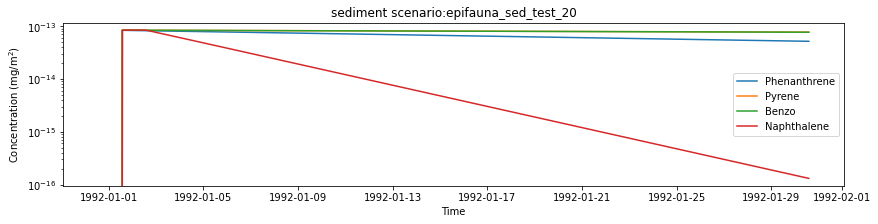

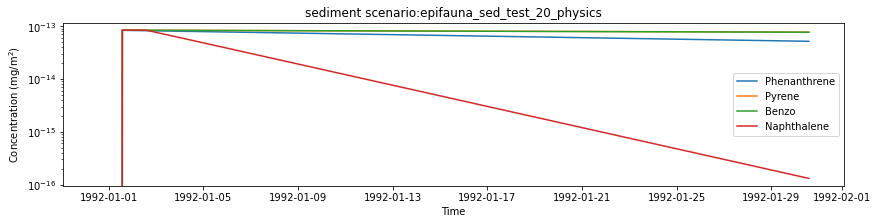

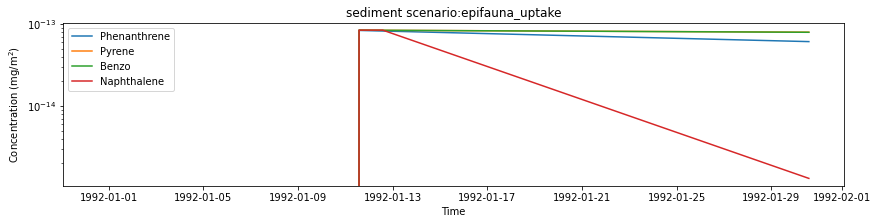

In [19]:
sediment_conc(groups.pahs, 'sediment')

### Epifauna contaminants

In [8]:
def epifauna_conc(group, plot_name):
    for scenario, path in zip(scenario_datasets, scenario_paths):
        fig, ax = plt.subplots(figsize = (14,3))
        nm = path.parent.stem
        for variable in group:
            contam_tb = np.ma.filled(scenario.variables[variable], np.nan)
            time = np.ma.filled(scenario.variables['t'], np.nan)
            contam_t = contam_tb.sum(axis=1)
            ax.semilogy(time, contam_t) 
        ax.legend(group)
        ax.set_ylabel('Concentration (mg/m$^2$)')
        ax.set_xlabel('Time')
        ax.set_title(plot_name + ' scenario:' + nm)

/tmp/ipykernel_3269023/3950011244.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (14,3))
/home/rlovindeer/conda_envs/salishsea-tools/lib/python3.9/site-packages/matplotlib_inline/backend_inline.py:234: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


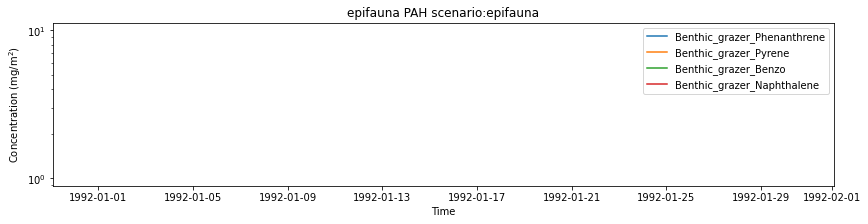

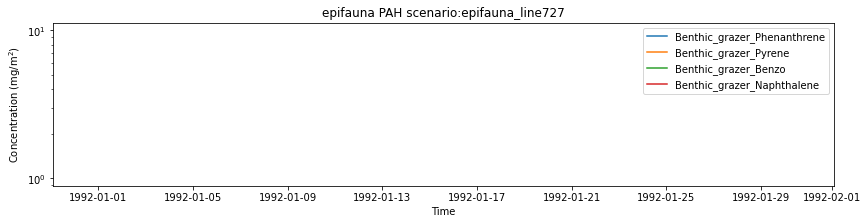

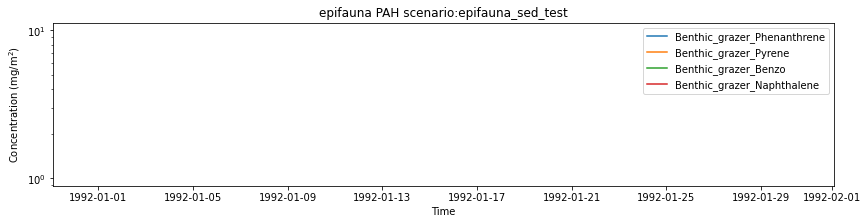

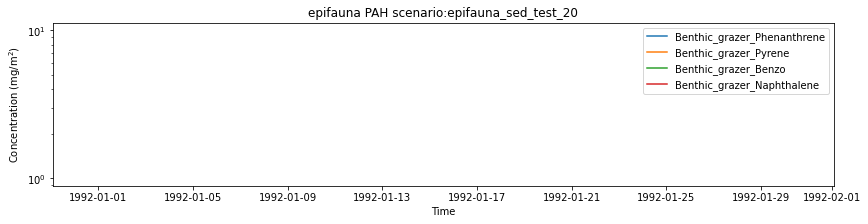

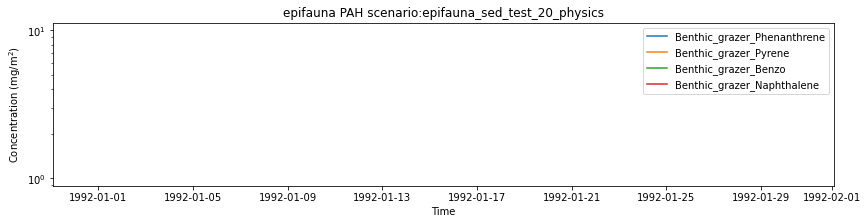

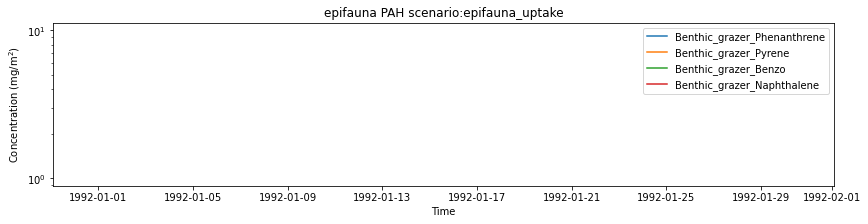

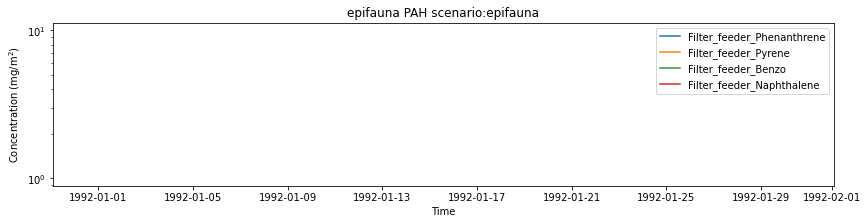

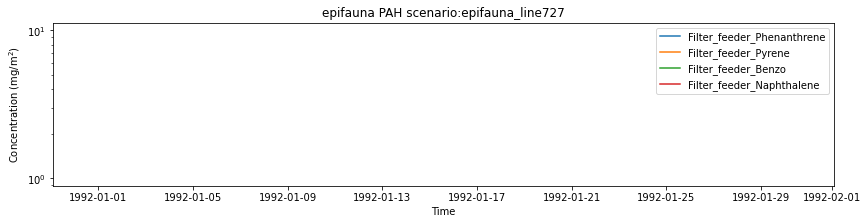

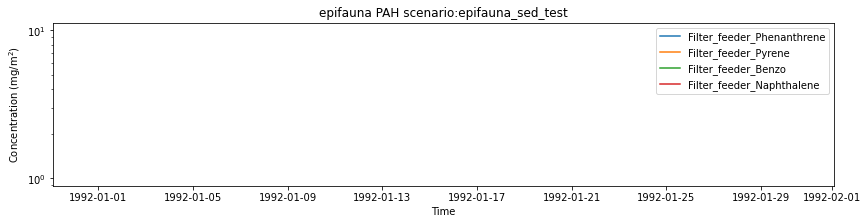

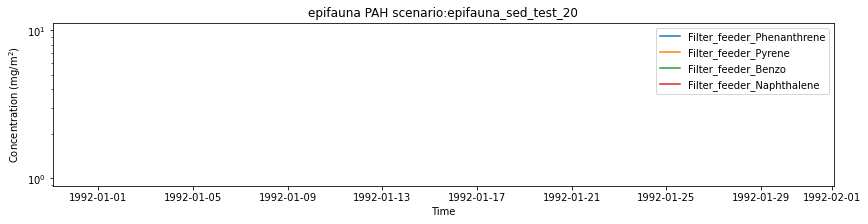

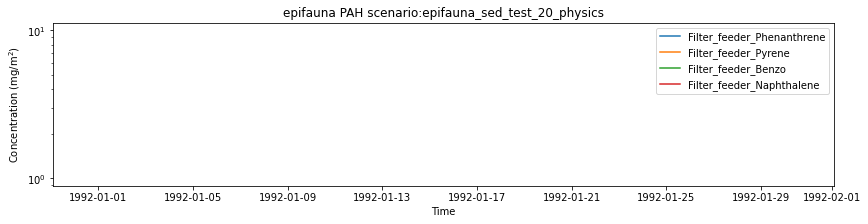

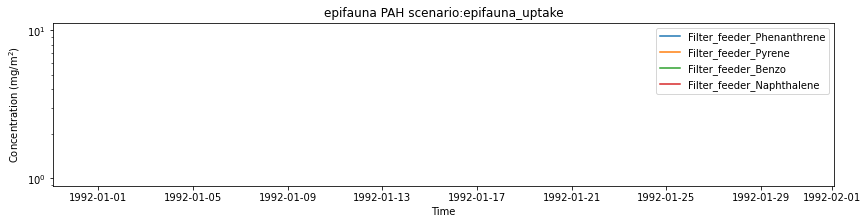

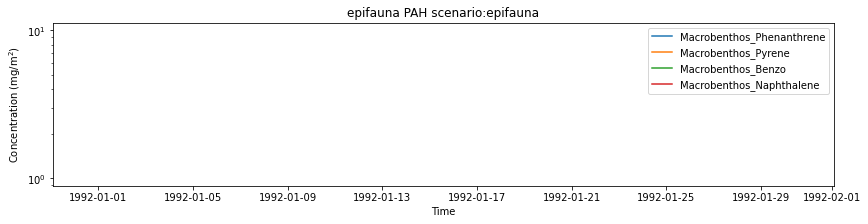

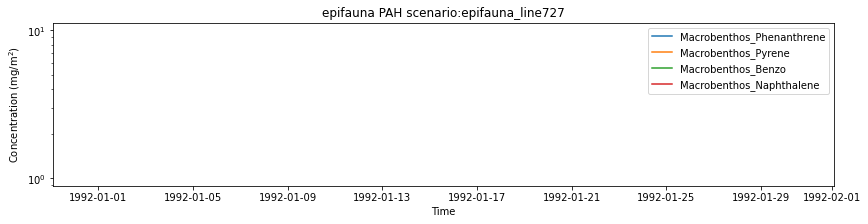

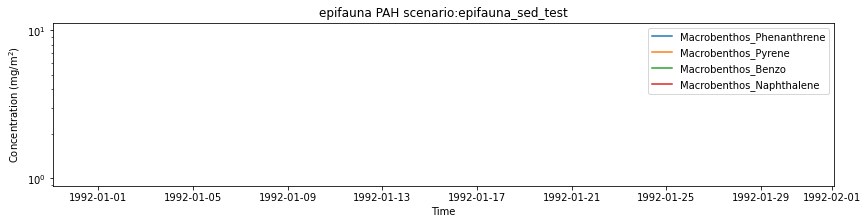

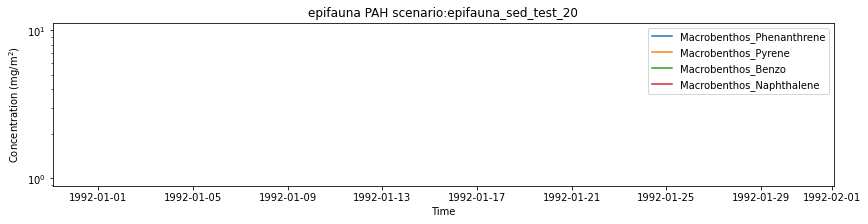

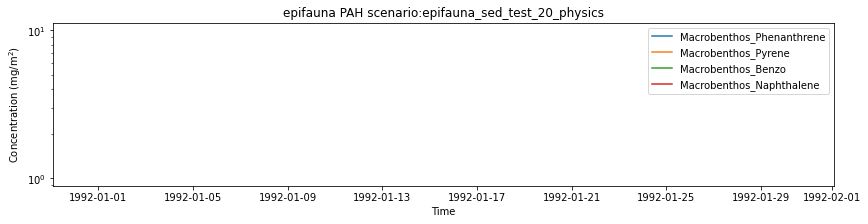

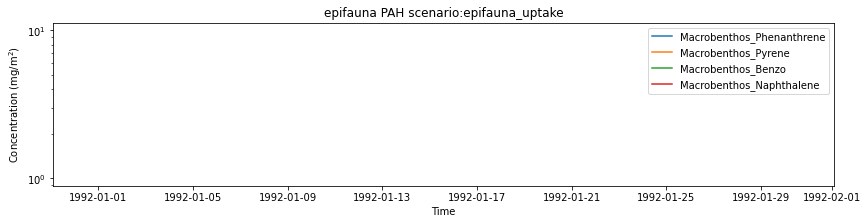

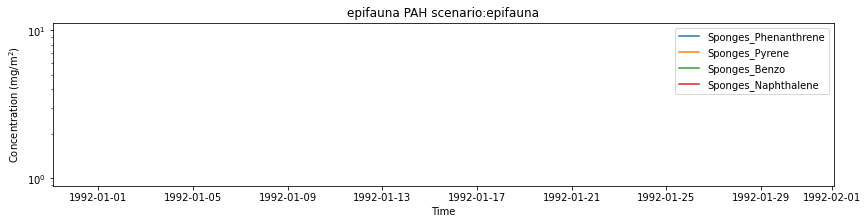

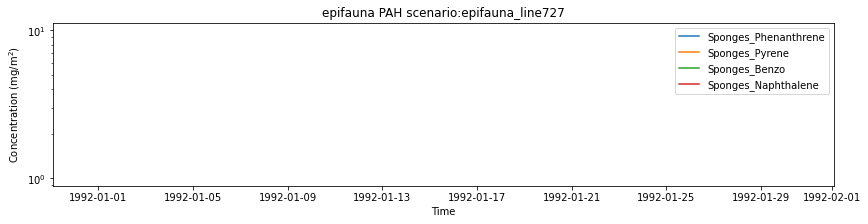

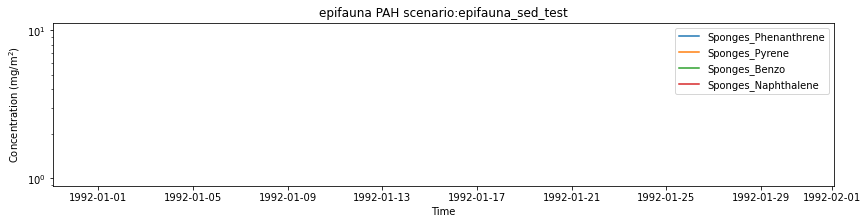

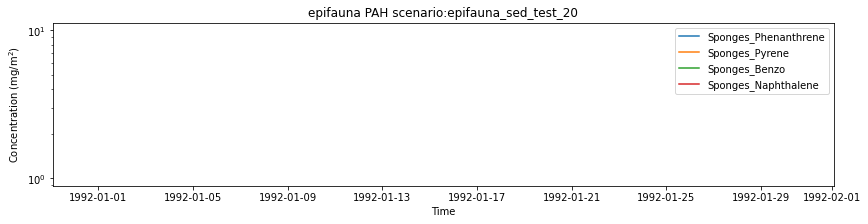

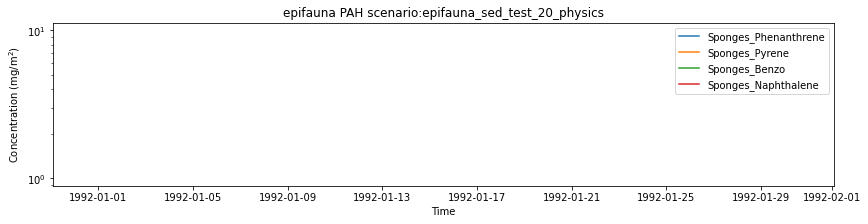

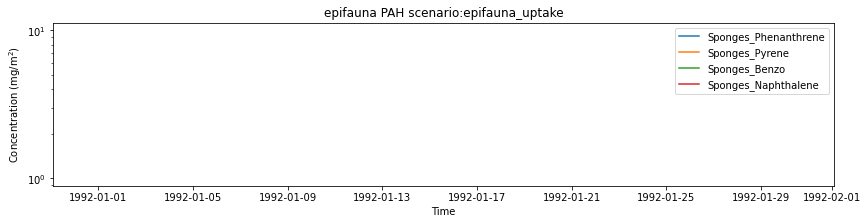

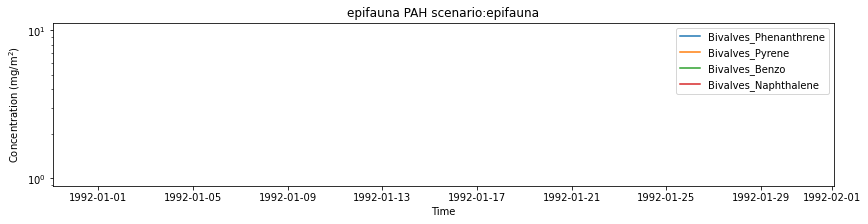

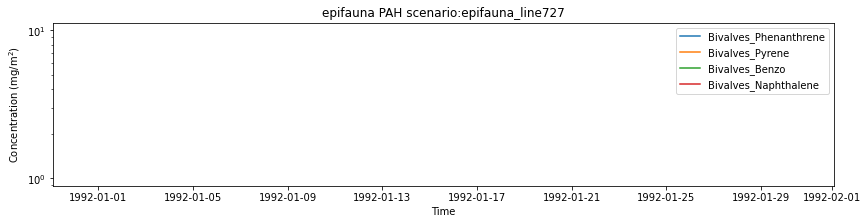

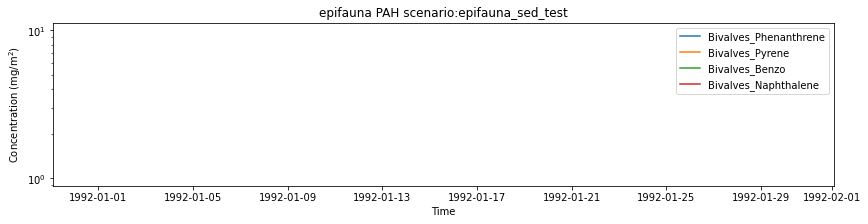

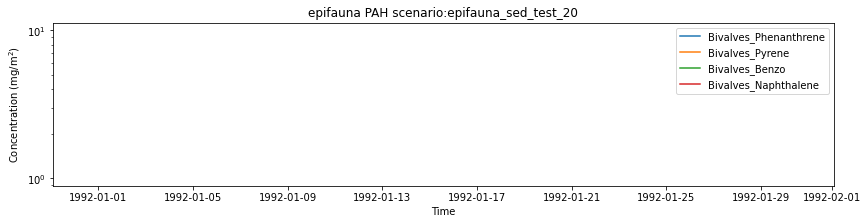

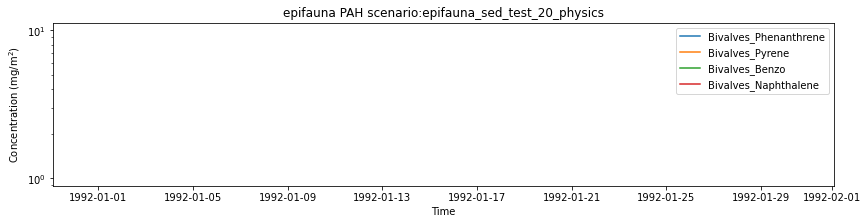

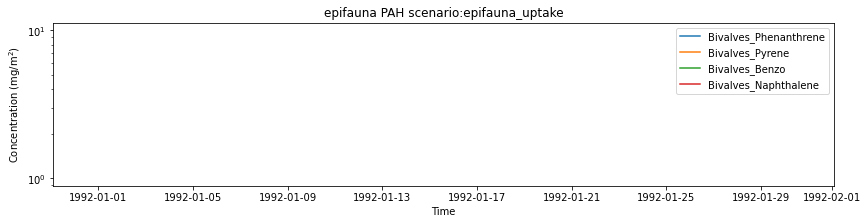

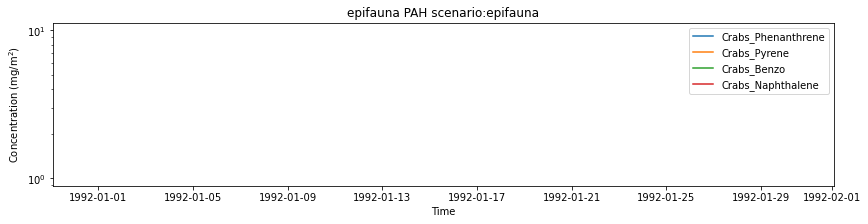

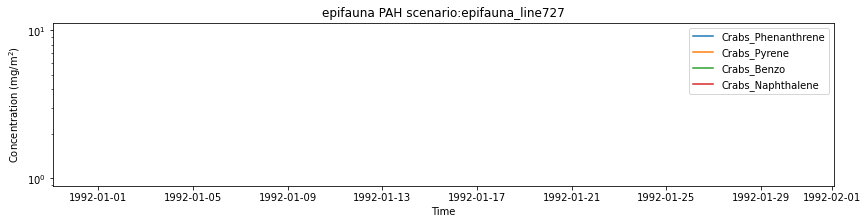

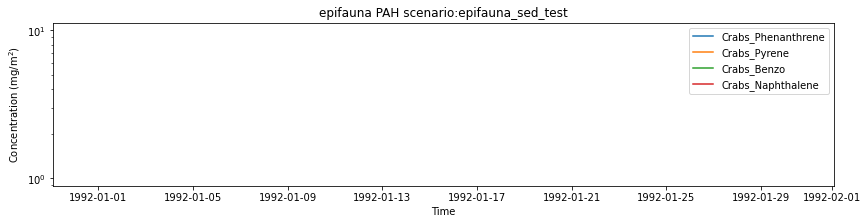

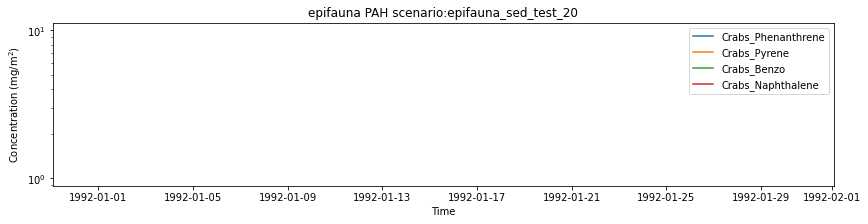

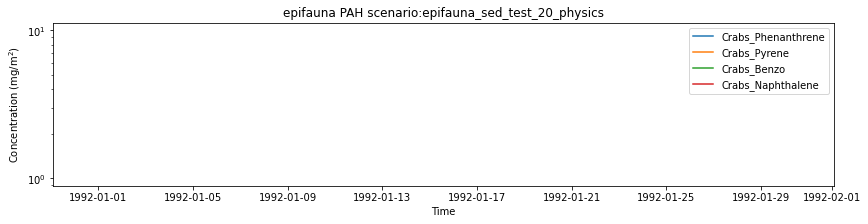

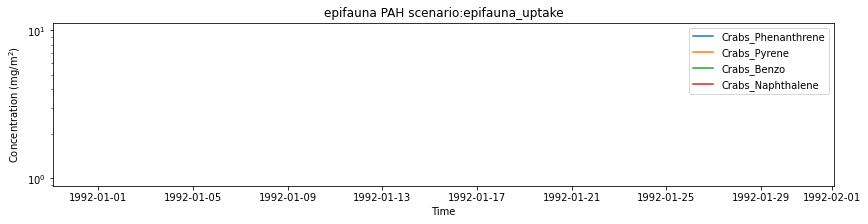

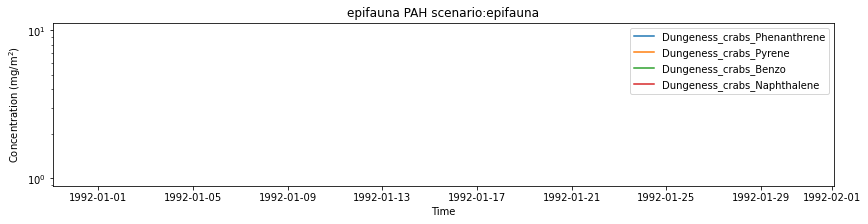

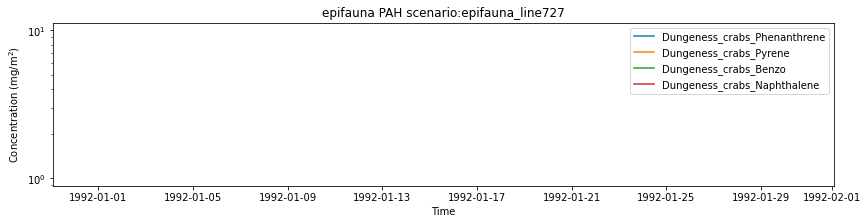

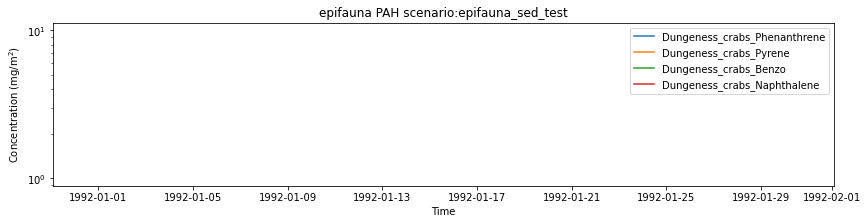

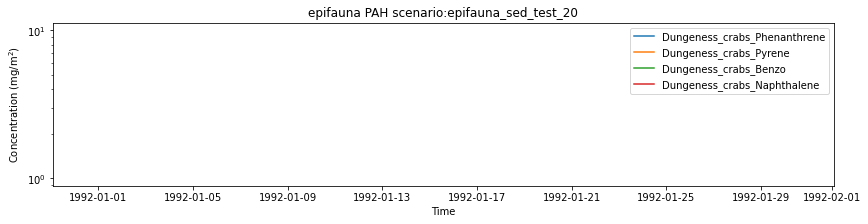

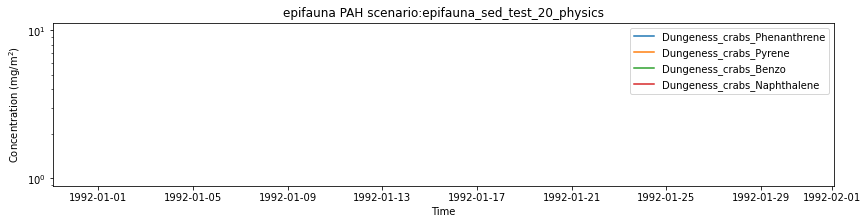

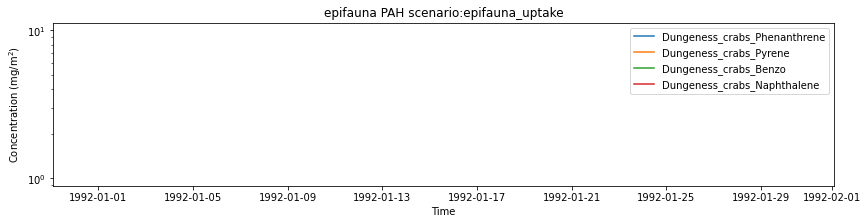

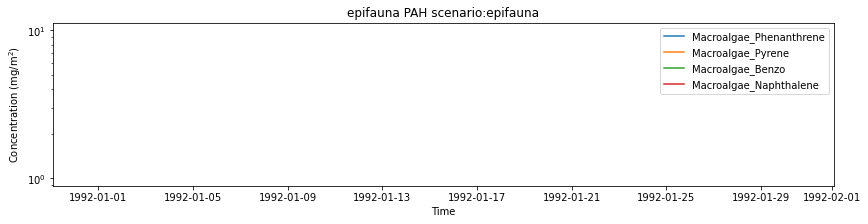

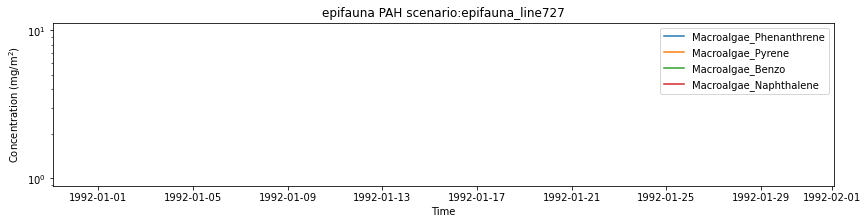

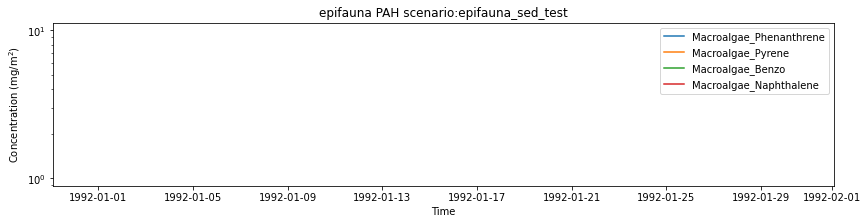

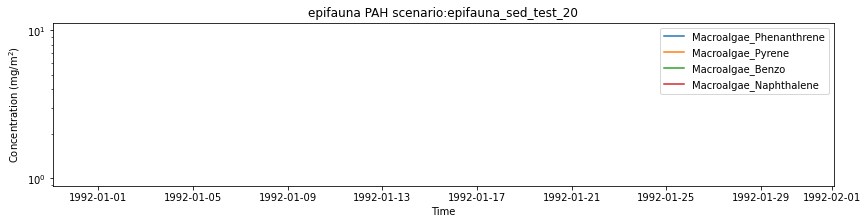

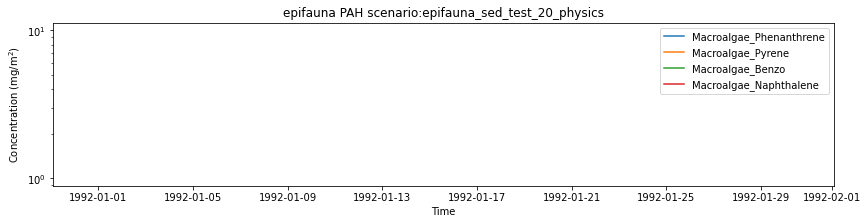

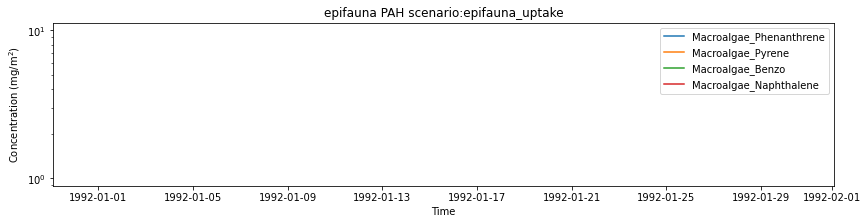

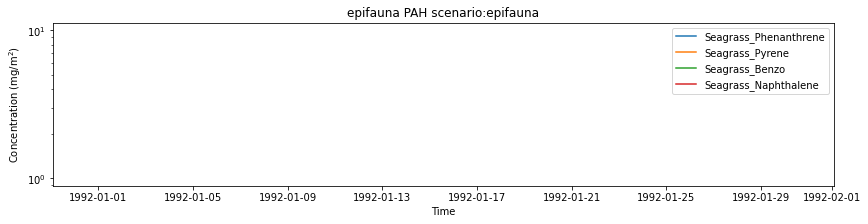

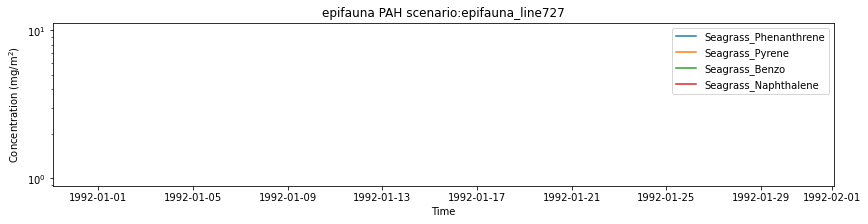

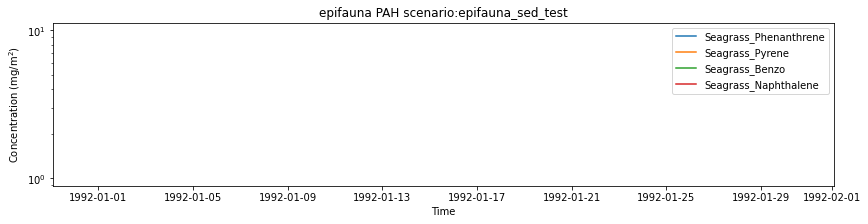

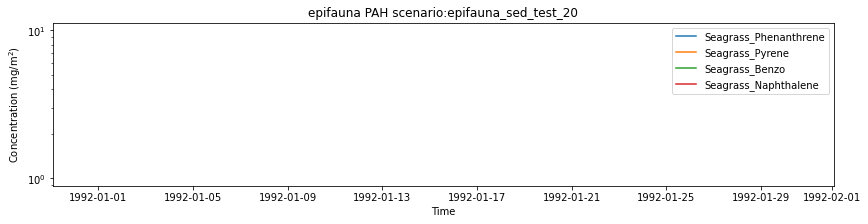

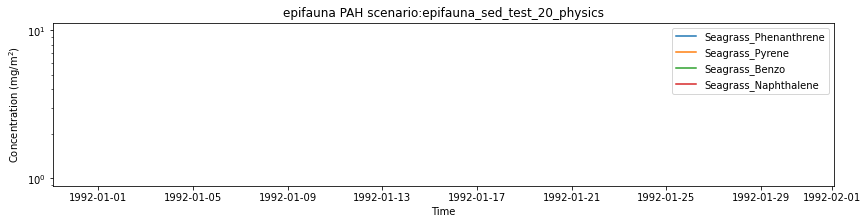

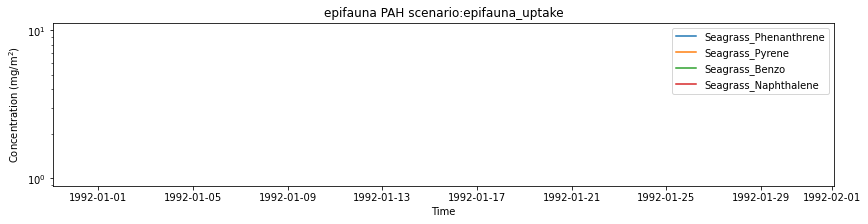

In [20]:
for species in groups.benthos:
    var_names = []
    for pah in groups.pahs:
        var_name = str(groups.benthos[species])+'_'+str(pah)
        var_names.append(var_name)
    epifauna_conc(var_names, 'epifauna PAH')

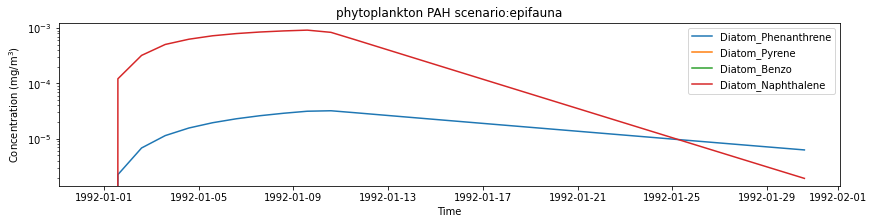

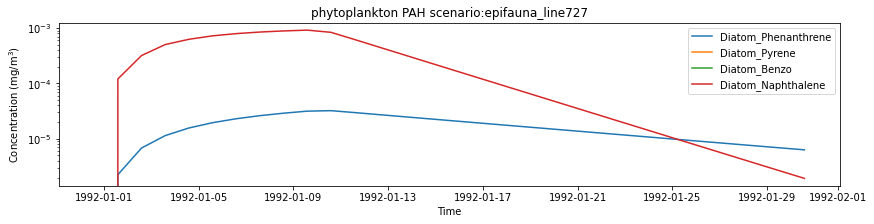

/home/rlovindeer/conda_envs/salishsea-tools/lib/python3.9/site-packages/matplotlib_inline/backend_inline.py:234: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


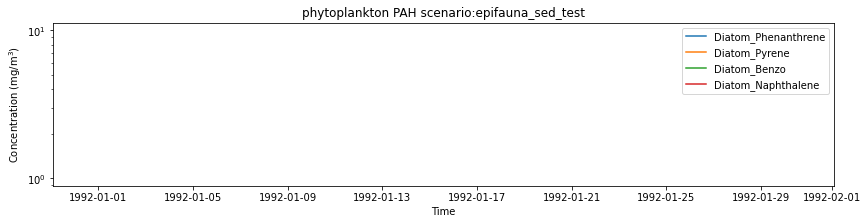

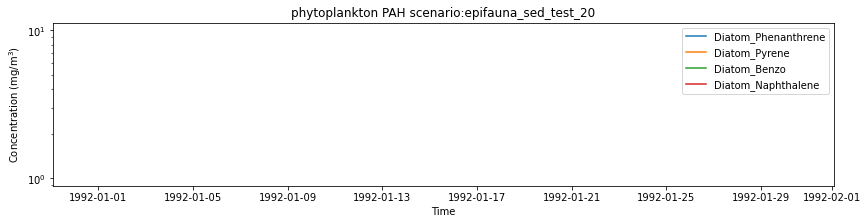

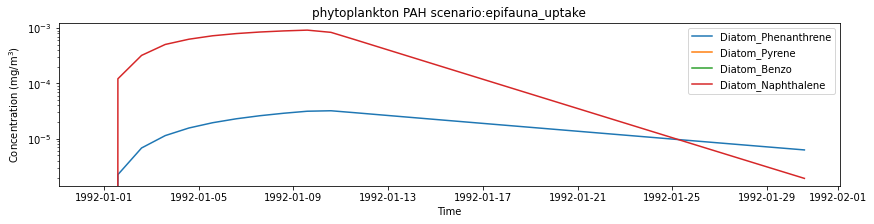

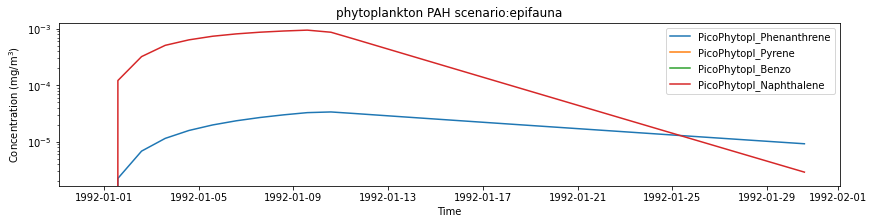

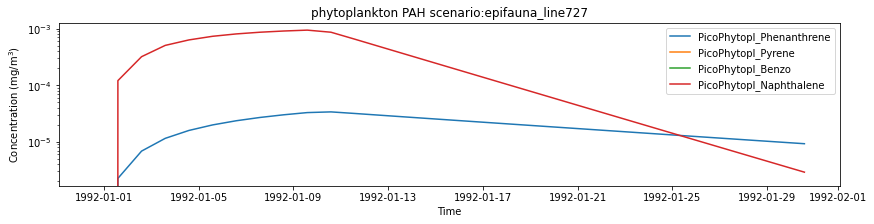

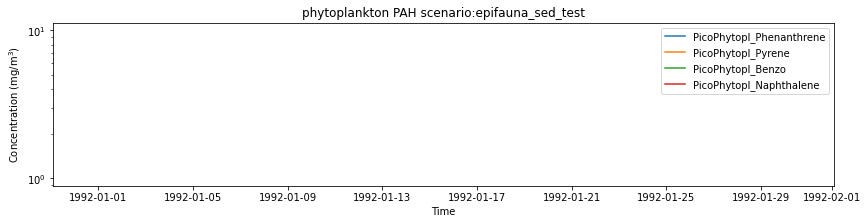

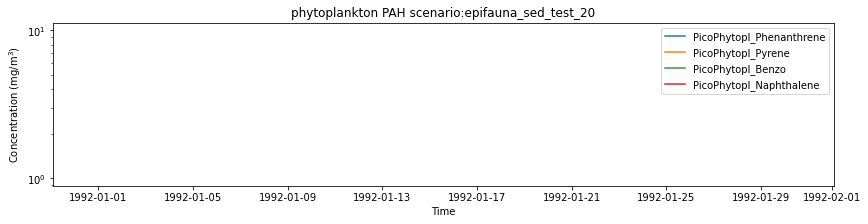

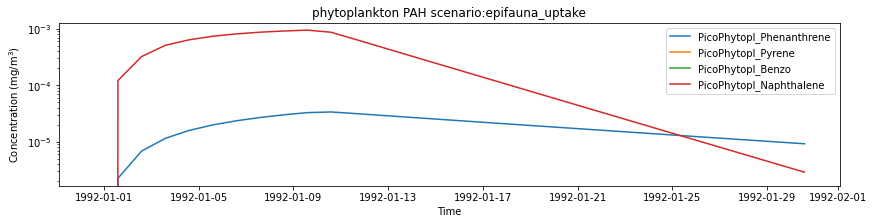

In [17]:
for species in groups.phytoplankton:
    var_names = []
    for pah in groups.pahs:
        var_name = str(groups.phytoplankton[species])+'_'+str(pah)
        var_names.append(var_name)
    water_column_conc(var_names, 'phytoplankton PAH')